<a href="https://colab.research.google.com/github/AtoanyUP/UVA_Assignment/blob/master/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Why Convolutional Neural Networks**

The main structural feature of RegularNets is that all the neurons are connected to each other. For example, when we have images with 28 by 28 pixels with only greyscale, we will end up having 784 (28 x 28 x 1) neurons in a layer which seems manageable. However, most images have way more pixels and they are not grey-scaled. Therefore, assuming that we have a set of color images in 4K Ultra HD, we will have 26,542,080 (4096 x 2160 x 3) different neurons connected to each other in the first layer which is not really manageable. Therefore, we can say that RegularNets are not scalable for image classification. However, especially when it comes to images, there seems to be little correlation or relation between two individual pixels unless they are close to each other. This leads to the idea of Convolutional Layers and Pooling Layers.

Layers in a CNN

We are capable of using many different layers in a convolutional neural network. However, convolution, pooling, and fully connect layers are the most important ones. Therefore, I will quickly introduce these layers before implementing them.

Convolutional Layers

Convolutional layer is the very first layer where we extract features from the images in our datasets. Due to the fact that pixels are only related with the adjacent and close pixels, convolution allows us to preserve the relationship between different parts of an image. Convolution is basically filtering the image with a smaller pixel filter to decrease the size of the image without loosing the relationship between pixels. When we apply convolution to 5x5 image by using a 3x3 filter with 1x1 stride (1 pixel shift at each step). We will end up having a 3x3 output (64% decrease in complexity).

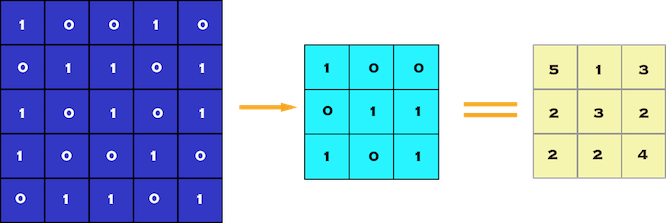

Pooling Layer

When constructing CNNs, it is common to insert pooling layers after each convolution layer to reduce the spatial size of the representation to reduce the parameter counts which reduces the computational complexity. In addition, pooling layers also helps with the overfitting problem. Basically we select a pooling size to reduce the amount of the parameters by selecting the maximum, average, or sum values inside these pixels. Max Pooling, one of the most common pooling techniques, may be demonstrated as follows:

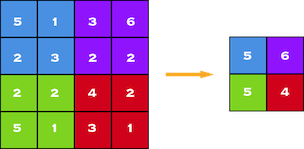

## **A Set of Fully Connected Layers**

A fully connected network is our RegularNet where each parameter is linked to one another to determine the true relation and effect of each parameter on the labels. Since our time-space complexity is vastly reduced thanks to convolution and pooling layers, we can construct a fully connected network in the end to classify our images. A set of fully connected layers looks like this:

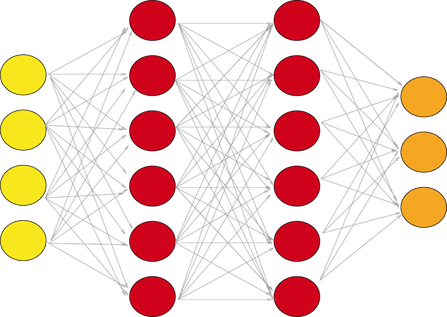

Now that you have some idea about the individual layers that we will use, I think it is time to share an overview look of a complete convolutional neural network.

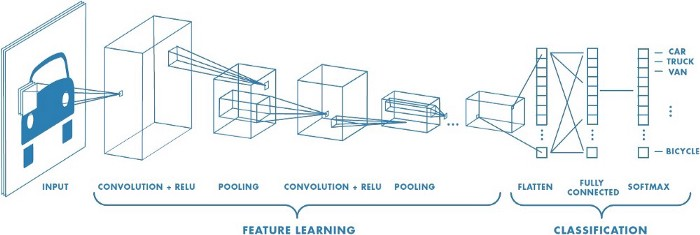

And now that you have an idea of convolutional neural network that you can build for image classification, we can get the most cliche dataset for classification: MNIST dataset, which stands for Modified National Institute of Standards and Technology database. It is a large database of handwritten digits that is commonly used for training various image processing systems.

## **Downloading the Mnist Data**

The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API. Therefore, I will start with the following two lines to import tensorflow and MNIST dataset under the Keras API.

In [1]:
#https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students [4]. Therefore, in the second line, I have separated these two groups as train and test and also separated the labels and the images. x_train and x_test parts contain greyscale RGB codes (from 0 to 255) while y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are. To visualize these numbers, we can get help from matplotlib.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

UsageError: unrecognized arguments: # Only use this if using iPython


When we run the code above, we will get the greyscale visualization of the RGB codes as shown below.

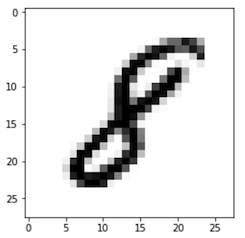

We also need to know the shape of the dataset to channel it to the convolutional neural network. Therefore, I will use the “shape” attribute of numpy array with the following code:

In [3]:
x_train.shape

(60000, 28, 28)

You will get (60000, 28, 28). As you might have guessed 60000 represents the number of images in the train dataset and (28, 28) represents the size of the image: 28 x 28 pixel.

## **Reshaping and Normalizing the Images**

To be able to use the dataset in Keras API, we need 4-dims numpy arrays. However, as we see above, our array is 3-dims. In addition, we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code). This can be done with the following code:

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# Building the Convolutional Neural Network

We will build our model by using high level Keras API which uses either TensorFlow or Theano on the backend. I would like to mention that there are several high level TensorFlow APIs such as Layers, Keras, and Estimators which helps us create neural networks with high level knowledge. However, this may lead to confusion since they all varies in their implementation structure. Therefore, if you see completely different codes for the same neural network although they all use tensorflow, this is why. I will use the most straightforward API which is Keras. Therefore, I will import the Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers. I have already talked about Conv2D, Maxpooling, and Dense layers. In addition, Dropout layers fight with the overfitting by disregarding some of the neurons while training while Flatten layers flatten 2D arrays to 1D array before building the fully connected layers.

In [5]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

We may experiment with any number for the first Dense layer; however, the final Dense layer must have 10 neurons since we have 10 number classes (0, 1, 2, …, 9). You may always experiment with kernel size, pool size, activation functions, dropout rate, and number of neurons in the first Dense layer to get a better result.

## **Compiling and Fitting the Model**

With the above code, we created an non-optimized empty CNN. Now it is time to set an optimizer with a given loss function which uses a metric. Then, we can fit the model by using our train data. We will use the following code for these tasks:

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2209 - accuracy: 0.9336
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0890 - accuracy: 0.9730
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0607 - accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0476 - accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0360 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0315 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0272 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0223 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0211 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 32s 17m

You can experiment with the optimizer, loss function, metrics, and epochs. However, I can say that adam optimizer is usually out-performs the other optimizers. I am not sure if you can actually change the loss function for multi-class classification. Feel free to experiment and comment below. Epoch number might seem a bit small. However, you will reach to 98–99% test accuracy. Since the MNIST dataset does not require heavy computing power, you may easily experiment with the epoch number as well.

## **Evaluating the Model**

Finally, you may evaluate the trained model with x_test and y_test using one line of code:

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0581 - accuracy: 0.9860


[0.05814677104353905, 0.9860000014305115]

The results are pretty good for 10 epochs and for such simple model.

We achieved 98.5% accuracy with such basic model. To be frank, in many image classification cases (e.g. for autonomous cars), we cannot even tolerate 0.1% error since, as an analogy, it will cause 1 accident in 1000 cases. However, for our first model, I would say the result is still pretty good. We can also make individual predictions with the following code:

The prediction of the image is: 9




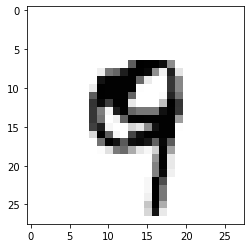

In [13]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("The prediction of the image is: " + str(pred.argmax()))
print("\n")
#print(pred.argmax())

Although it is not really a good hand writing of the number 9, our model was able to classify it as 9.

## **Congratulations!**

You have successfully built a convolutional neural network to classify hand written digits with Tensorflow’s Keras API. You have achieved an accuracy over 98% and now you can even save this model & create a digit-classifier app! If you are curious about saving your model, I would like to direct you to the Keras Documentation. After all, to be able to efficiently use an API, one must learn how to read and use the documentation.

## **Resources**

[1] KataKoda, https://www.katacoda.com/basiafusinska/courses/tensorflow-getting-started/tensorflow-mnist-beginner

[2] CS231n Convolutional Neural Networks for Visual Recognition (http://cs231n.github.io/convolutional-networks/)

[3] MathWorks, Introducing Deep Learning with MATLAB, https://www.mathworks.com/content/dam/mathworks/tag-team/Objects/d/80879v00_Deep_Learning_ebook.pdf

[4] Wikipedia, MNIST database, https://en.wikipedia.org/wiki/MNIST_database